## Feature Selection 

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
import os

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import tree

## documentation: https://scikit-learn.org/stable/modules/feature_selection.html
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
digits = datasets.load_digits()

X = digits['data']
Y = digits['target']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 2022)

In [4]:
print("We have", X.shape[1], "features")

We have 64 features


## Drop constants / features with low variance

- compute the variance / standard deviation of each column,
- drop the small ones (below a threshold

The X values are a 64 digit string: [ 0.  0.  0.  3. 16.  3.  0.  0.  0.  0.  0. 12. 16.  2.  0.  0.  0.  0.
  8. 16. 16.  4.  0.  0.  0.  7. 16. 15. 16. 12. 11.  0.  0.  8. 16. 16.
 16. 13.  3.  0.  0.  0.  0.  7. 14.  1.  0.  0.  0.  0.  0.  6. 16.  0.
  0.  0.  0.  0.  0.  4. 14.  0.  0.  0.]
and the y is the value of the number 4


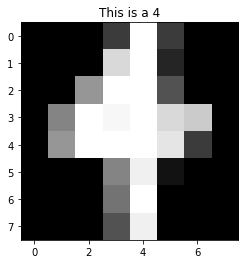

In [5]:
## look at some numbers
n = 134

plt.imshow(digits['images'][n], cmap='Greys_r')
plt.title('This is a %d' % digits['target'][n])

print("The X values are a 64 digit string:", X[n])
print("and the y is the value of the number", Y[n])

In [6]:
## Find all of the variances to develop better method
df = pandas.DataFrame(X)
var_array = df.var()

print("The smallest variance is: ", min(var_array))
print("The largest variance is: ", max(var_array))

## the 25th percentile is:
print("Q1 of variances is: ", np.quantile(var_array, .25))

The smallest variance is:  0.0
The largest variance is:  42.74485129261464
Q1 of variances is:  1.0493836857519279


In [52]:
## initialize at a threshold of 0
drop_constants = VarianceThreshold(threshold = 0)

## fit to drop all non-zero columns
X_new = drop_constants.fit_transform(X)

## Inspect results:
drop_constants.variances_

print("We now have ", X_new.shape[1], " features")
print("We dropped ", X.shape[1]-X_new.shape[1]," features")

We now have  61  features
We dropped  3  features


In [53]:
## Cut out 25% of numbers:
Q1 = np.quantile(var_array,.25)

drop_constants = VarianceThreshold(threshold = Q1)

## fit to drop all non-zero columns
X_new =drop_constants.fit_transform(X)

## Inspect results:
drop_constants.variances_

print("We now have ", X_new.shape[1], " features")
print("We dropped ", X.shape[1]-X_new.shape[1]," features")


We now have  48  features
We dropped  16  features


## Question

Do we have a better model?  Let's use it!

## Find the "Best" features:

here, I present our old friend $\chi^2$!

In [57]:
##Explore!

?SelectKBest

In [56]:
## pick the top 48 with the biggest chi-square values

X_new = SelectKBest(chi2, k=48).fit_transform(X, Y)
print("We now have ", X_new.shape[1], " features")
print("We dropped ", X.shape[1]-X_new.shape[1]," features")

We now have  48  features
We dropped  16  features
